1) Import ไฟล์ AB_NYC_2019 และ เช็คข้อมูลเบื้องต้น

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

2) สุ่มอ่านข้อมูล 10 แถว หัว 5 แถว และท้าย 10 แถว

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
frames =[df.head(5), df.tail(5)]
pd.concat(frames)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


3) หา Top 10 Neighbourhood ยอดฮิต พร้อมระบุจำนวน

In [ ]:
topNeighbourhood = df['neighbourhood'].value_counts().head(10)
topNeighbourhood.index.name = "Neighbourhood"
topNeighbourhood

Neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

4) หา Bottom 10 Neighbourhood ยอดฮิต พร้อมระบุจำนวน

In [ ]:
bottomNeighbourhood = df['neighbourhood'].value_counts().tail(10)
bottomNeighbourhood.index.name = "Neighbourhood"
bottomNeighbourhood

Neighbourhood
Co-op City                    2
Bay Terrace, Staten Island    2
Lighthouse Hill               2
West Farms                    2
Woodrow                       1
Rossville                     1
Fort Wadsworth                1
New Dorp                      1
Richmondtown                  1
Willowbrook                   1
Name: neighbourhood, dtype: int64

5) หา Top 10 Neighbourhood Group ยอดฮิต พร้อมระบุจำนวน

In [ ]:
top_neighbourhood_group = df['neighbourhood_group'].value_counts().head()
top_neighbourhood_group.index.name = "Neighbourhood_Group"
top_neighbourhood_group
# ข้อมูลมีแค่ 5 กลุ่ม

Neighbourhood_Group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

6) หา Bottom 10 Neighbourhood Group ยอดฮิต พร้อมระบุจำนวน

In [ ]:
bottom_neighbourhood_group = df['neighbourhood_group'].value_counts().tail()
bottom_neighbourhood_group.index.name = "Neighbourhood_Group"
bottom_neighbourhood_group
# ข้อมูลมีแค่ 5 กลุ่ม

Neighbourhood_Group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

7) หาค่าเฉลี่ยราคาของพื้นที่ และเขต

In [ ]:
df[['neighbourhood', 'price']].groupby('neighbourhood').mean()

,price
neighbourhood,
Allerton,87.595238
Arden Heights,67.250000
Arrochar,115.000000
Arverne,171.779221
Astoria,117.187778
...,...
Windsor Terrace,138.993631
Woodhaven,67.170455
Woodlawn,60.090909


In [ ]:
df[['neighbourhood_group', 'price']].groupby('neighbourhood_group').mean()

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


8) จงหาว่าห้องประเภทใดมีราคาเฉลี่ยมากที่สุด

In [ ]:
df[['room_type', 'price']].groupby('room_type').mean().head(1)

,price
room_type,
Entire home/apt,211.794246


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


9) จงหาว่าพื้นที่ใดมีข้อมูลพื้นที่อยู่แค่หน่วยเดียว

In [ ]:
neightbourhood = df['neighbourhood'].value_counts()
neightbourhood[neightbourhood==1]

Woodrow           1
Rossville         1
Fort Wadsworth    1
New Dorp          1
Richmondtown      1
Willowbrook       1
Name: neighbourhood, dtype: int64

10) จงหาว่าที่พักแบบใดมีการให้บริการมากที่สุด และมากเท่าใด

In [ ]:
df['room_type'].value_counts().head(1)

Entire home/apt    25409
Name: room_type, dtype: int64

11) จงหาว่าพื้นที่ใดมีจำนวนรีวิวมากที่สุด และ เขตใดมีจำนวนรีวิวมากที่สุด

In [ ]:
# พื้นที่มีจำนวนรีวิวมากที่สุด
df[['neighbourhood', 'number_of_reviews']].groupby('neighbourhood').sum().sort_values(by='number_of_reviews', ascending=False).head(1)

,number_of_reviews
neighbourhood,
Bedford-Stuyvesant,110352


In [ ]:
# เขตที่มีจำนวนรีวิวมากที่สุด
df[['neighbourhood_group', 'number_of_reviews']].groupby('neighbourhood_group').sum().sort_values(by='number_of_reviews', ascending=False).head(1)

,number_of_reviews
neighbourhood_group,
Brooklyn,486574


12) จงหา Top 3 จำนวน Minimum Nights ที่มีเขตไม่ซ้ำกัน

In [ ]:
x = df[['neighbourhood_group', 'minimum_nights']].sort_values(by = 'minimum_nights', ascending = False)
x[x['neighbourhood_group'].duplicated(keep=False)].drop_duplicates('neighbourhood_group').head(3)

,neighbourhood_group,minimum_nights
5767,Manhattan,1250
26341,Brooklyn,999
7355,Queens,500


13) จงหาชื่อ Host ที่ลิสที่อยู่มากที่สุด 10 อันดับแรก (Hint: ใช้ชื่อไม่ได้)

In [ ]:
# ใช้ ้ host_id เพราะสามารถชื่อซ้ำกันได้
df[['host_id',"calculated_host_listings_count"]].groupby('host_id').count().sort_values(by='calculated_host_listings_count', ascending=False).head(10)

,calculated_host_listings_count
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65


14) จงหาชื่อ Host ที่มีชื่อซ้ำกันมากที่สุด 10 ชื่อ (โดยที่ไม่ใช้คนเดียวกัน)

In [ ]:
duplicate_host_name = df[['host_id', 'host_name']].drop_duplicates()
duplicate_host_name['host_name'].value_counts().head(10)

Michael    335
David      318
Alex       226
Daniel     208
Sarah      199
John       188
Andrew     163
Chris      162
Maria      161
Anna       156
Name: host_name, dtype: int64

15) จงหาชื่อ Host ที่มีรีวิวมากที่สุด 10 อันดับแรก

In [ ]:
df[['host_id','number_of_reviews']].groupby('host_id').sum().sort_values(by='number_of_reviews', ascending=False)

,number_of_reviews
host_id,
37312959,2273
344035,2205
26432133,2017
35524316,1971
40176101,1818
...,...
140338526,0
24508767,0
140323391,0


16) จงหาชื่อ Host ที่มีการลิสที่อยู่ที่มีราคาเฉลี่ยสูงที่สุด 10 อันดับแรก

In [ ]:
df[['host_id', 'price']].groupby('host_id').mean().sort_values(by='price', ascending=False).head(10)

,price
host_id,
72390391,10000.0
20582832,10000.0
5143901,10000.0
4382127,9999.0
3906464,9999.0
1235070,9999.0
18128455,8500.0
7407743,7500.0
35303743,6500.0


In [ ]:
# แสดงชื่อ ของ host ด้วย
df.groupby(['host_id', 'host_name']).mean()[['price']].sort_values(by='price', ascending=False).head(10)

,,price
host_id,host_name,
20582832,Kathrine,10000.0
5143901,Erin,10000.0
72390391,Jelena,10000.0
4382127,Matt,9999.0
3906464,Amy,9999.0
1235070,Olson,9999.0
18128455,Rum,8500.0
7407743,Jack,7500.0
35303743,Patricia,6500.0


17) จงเพิ่ม 2 คอลัมน์ชื่อ Year และ Month จาก last review ต่อท้าย โดยใช้ข้อมูลจากคอลัมน์ last_review (Hint: ใช้ lambda)¶

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [ ]:
# แปลง Dtype ของ Last_review เป็น datetime
df['last_review'] = pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null datetime64[ns]
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-nu

In [ ]:
year = list(df['last_review'].dt.year)
month = list(df['last_review'].dt.month)

In [ ]:
df.insert (13, "Year", year)

In [ ]:
df.insert (14, "Month", month)

In [ ]:
df = df.dropna(subset=['Year', 'Month'])
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,Year,Month,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,2018,10,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2019,5,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,2019,7,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,2018,11,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,2019,6,0.59,1,129


In [ ]:
# ใช้ Lambda ตาม hint
df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(subset=['last_review'], inplace=True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [ ]:
year = df['last_review'].apply(lambda x : x.split('-')[0])
month = df['last_review'].apply(lambda x : x.split('-')[1])

In [ ]:
df.insert(13, 'Year', year)
df.insert(14, 'Month', month)

18) สร้าง column ใหม่ โดยให้บรรจุ Time of the week (วันจันทร์ อังคาร....) โดยใช้ข้อมูลจาก last_review (Hint: ใช้ timestamp เข้ามาช่วย)

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [ ]:
day_in_week = df.apply(lambda x : x['last_review'].weekday(), axis=1)
days = ['จันทร์','อังคาร', 'พุธ', 'พฤหัส', 'ศุกร์', 'เสาร์', 'อาทิตย์']
df['time_of_week'] = day_in_week
df['time_of_week'] = df['time_of_week'].replace({0: days[0], 1:days[1], 2:days[2], 3:days[3], 4:days[4], 5:days[5], 6:days[6]})
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,Year,Month,reviews_per_month,calculated_host_listings_count,availability_365,time_of_week
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,2018,10,0.21,6,365,ศุกร์
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2019,05,0.38,2,355,อังคาร
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,2019,07,4.64,1,194,ศุกร์
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,2018,11,0.10,1,0,จันทร์
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,2019,06,0.59,1,129,เสาร์
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,2019,07,1.00,1,147,อาทิตย์
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,2019,07,1.00,6,339,อาทิตย์
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,2019,07,1.00,1,87,อาทิตย์
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2019,07,2.00,1,40,อาทิตย์


In [ ]:
# Hint: ใช้ datetime กับ map มาช่วย
from datetime import datetime
day_of_the_week = df['last_review'].map(lambda x : x.strftime('%a'))
df["day_of_the_week"] = day_of_the_week
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,Year,Month,reviews_per_month,calculated_host_listings_count,availability_365,time_of_week,day_of_the_week
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,2018,10,0.21,6,365,ศุกร์,Fri
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2019,05,0.38,2,355,อังคาร,Tue
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,2019,07,4.64,1,194,ศุกร์,Fri
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,2018,11,0.10,1,0,จันทร์,Mon
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,2019,06,0.59,1,129,เสาร์,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,2019,07,1.00,1,147,อาทิตย์,Sun
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,2019,07,1.00,6,339,อาทิตย์,Sun
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,2019,07,1.00,1,87,อาทิตย์,Sun
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2019,07,2.00,1,40,อาทิตย์,Sun


19) สร้าง Count Plot นับข้อมูลประเภทของที่อยู่อาศัย

Text(0.5, 1.0, 'Count Plot')

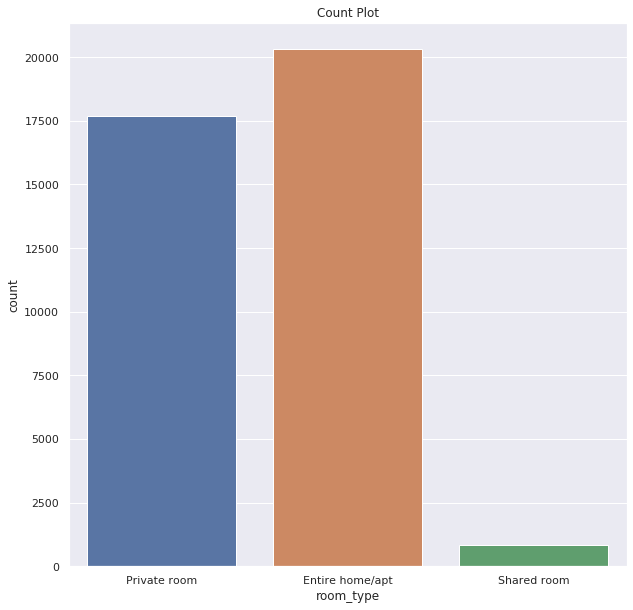

In [ ]:
fig = plt.figure(figsize=[10, 10])
fig = sns.set(style="darkgrid")
fig = sns.countplot(x="room_type", data=df)
plt.title("Count Plot")

20) สร้าง Pie Chart หาพื้นที่ ที่มีที่อยู่อาศัยเยอะที่สุด 5 อันดับแรก

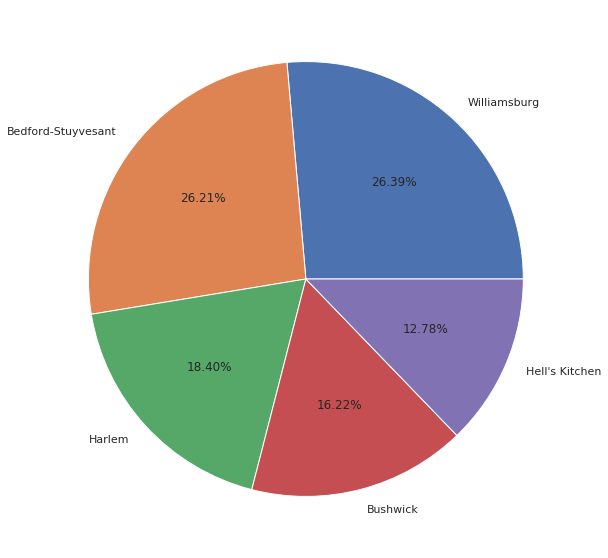

In [ ]:
top_5_neighbourhood = df['neighbourhood'].value_counts().head(5)
plt.figure(figsize = [10, 10])
plt.pie(top_5_neighbourhood, labels = top_5_neighbourhood.index, autopct='%1.2f%%')
plt.show()

21) สร้าง Box Plot โดยให้แกน X เป็น เขต และ Y เป็นจำนวนรีวิว

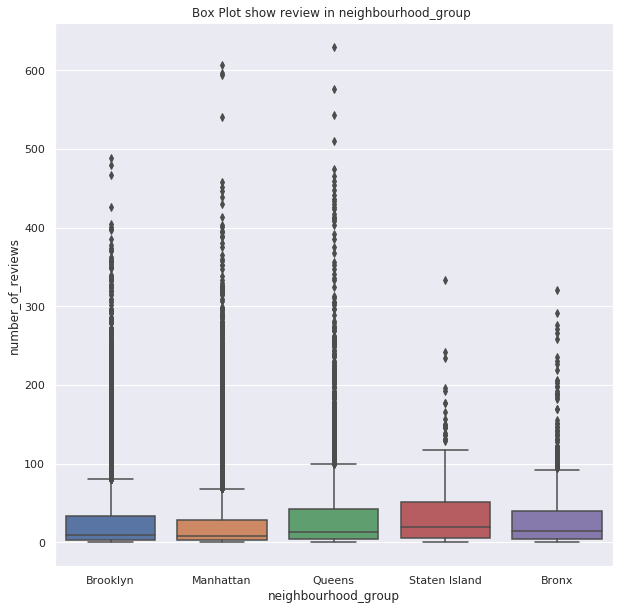

In [ ]:
review_by_group = df[['neighbourhood_group','number_of_reviews']].groupby('neighbourhood_group').sum()
fig = plt.figure(figsize=[10, 10])
sns.boxplot(x = 'neighbourhood_group', y = 'number_of_reviews', data = df)
plt.title("Box Plot show review in neighbourhood_group ")
plt.show()

22) สร้าง HeatMap จาก Correlation ของ DataFrame และพิจารณาดูความสัมพันธ์ พร้อมกับนำความสัมพันธ์ที่เป็น Strongest Positive มาทำ Scatter Plot

In [ ]:
df_corr =df.corr()
df_corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.591529,-0.010013,0.103150,-0.006647,-0.073902,-0.329865,0.291828,0.098482,0.006430
host_id,0.591529,1.000000,0.012946,0.141095,0.006269,-0.051693,-0.141819,0.296417,0.149412,0.155082
latitude,-0.010013,0.012946,1.000000,0.088152,0.031318,0.024808,-0.008746,-0.010142,0.004326,-0.022228
longitude,0.103150,0.141095,0.088152,1.000000,-0.155361,-0.055418,0.054681,0.145948,-0.093325,0.102540
price,-0.006647,0.006269,0.031318,-0.155361,1.000000,0.025506,-0.035938,-0.030608,0.052903,0.078234
minimum_nights,-0.073902,-0.051693,0.024808,-0.055418,0.025506,1.000000,-0.069368,-0.121702,0.073479,0.101686
number_of_reviews,-0.329865,-0.141819,-0.008746,0.054681,-0.035938,-0.069368,1.000000,0.549868,-0.059784,0.193557
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.098482,0.149412,0.004326,-0.093325,0.052903,0.073479,-0.059784,-0.009421,1.000000,0.182911
availability_365,0.006430,0.155082,-0.022228,0.102540,0.078234,0.101686,0.193557,0.185791,0.182911,1.000000


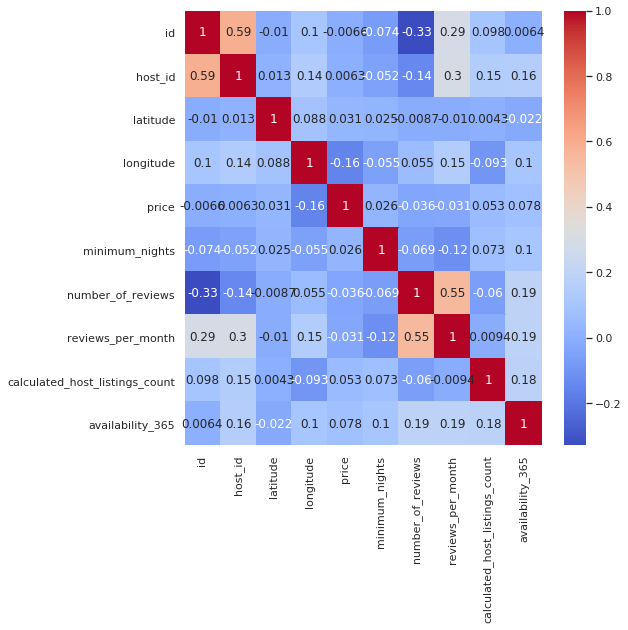

In [ ]:
fig = plt.figure(figsize=[8, 8])
sns.heatmap(df_corr , cmap = 'coolwarm', annot = True)
plt.show()

พิจารณาความสัมพันธ์จาก Heat Map พบว่า review_per_month และ number_review, id และ host_id มีความสัมพันธ์เป็น Strongest Positive จึงเลือกมาทำ Scrtter Plot

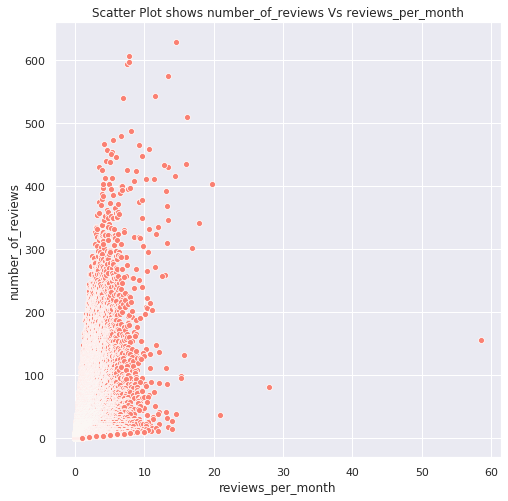

In [ ]:
fig = plt.figure(figsize=[8, 8])
sns.scatterplot(x = 'reviews_per_month', y ='number_of_reviews' , data = df, color='salmon' )
plt.title("Scatter Plot shows number_of_reviews Vs reviews_per_month")
plt.show()

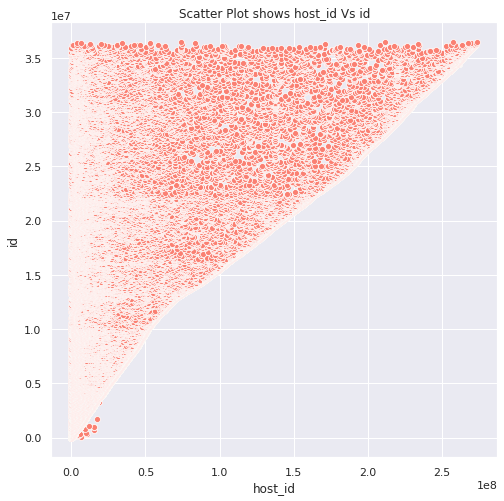

In [ ]:
fig = plt.figure(figsize=[8, 8])
sns.scatterplot(x = 'host_id', y ='id' , data = df, color='salmon' )
plt.title("Scatter Plot shows host_id Vs id")
plt.show()

23) สร้าง Count plot หาจำนวน Last review ของแต่ละเดือนของปี 2018

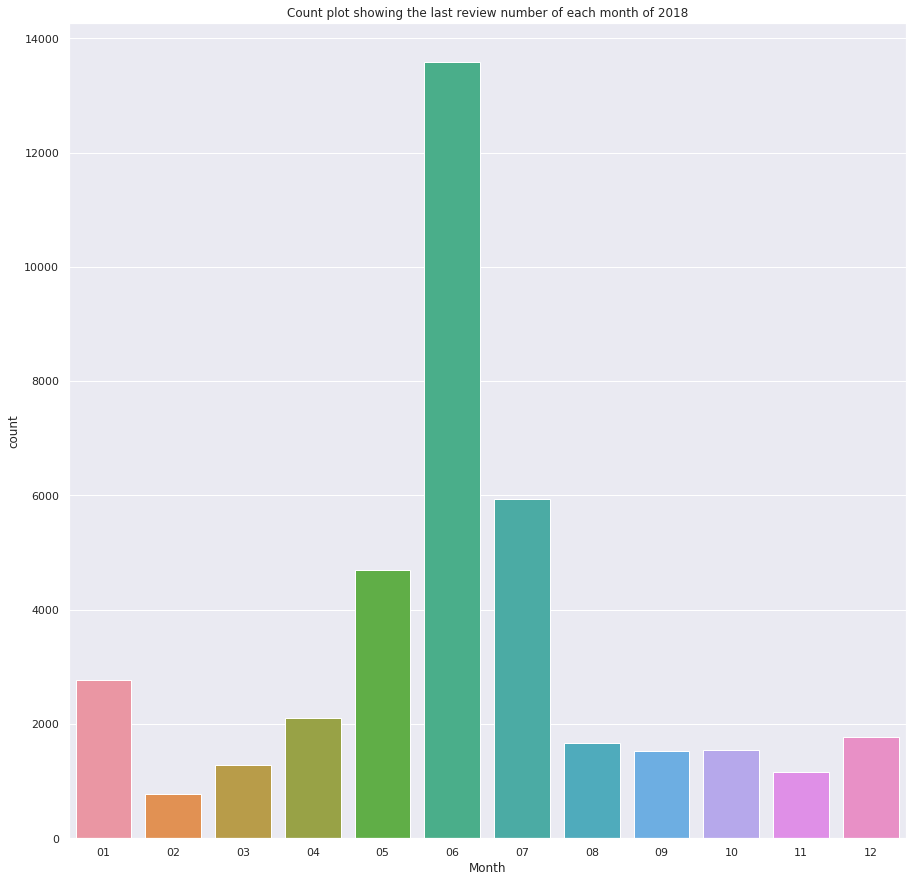

In [ ]:
last_review_2018 = df[df['last_review'].dt.year == 2018]
fig = plt.figure(figsize=[15, 15])
plt.title("Count plot showing the last review number of each month of 2018");
fig = sns.countplot(x="Month", data=df)

24) สร้าง Pie Chart หาอัตราส่วน Last Review ในแต่ละวัน

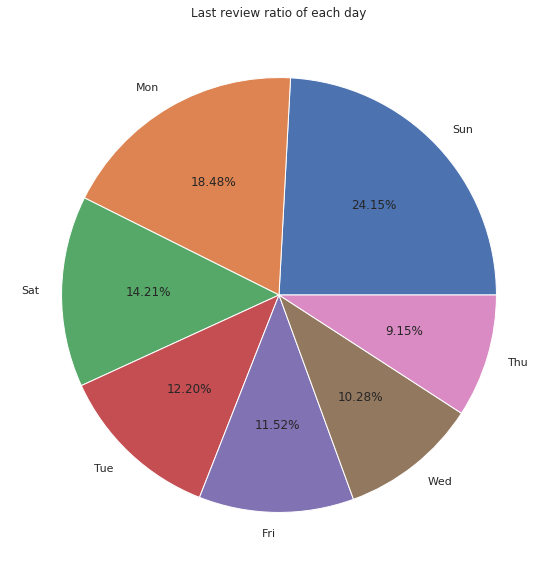

In [ ]:
day_of_the_week = df['day_of_the_week'].value_counts()
plt.figure(figsize = [10, 10])
plt.pie(day_of_the_week, labels = day_of_the_week.index, autopct='%1.2f%%')
plt.title("Last review ratio of each day")
plt.show()

25) สร้าง Line Graph หาราคาเฉลี่ยในแต่ละเดือนของ Last Review ในปี 2019

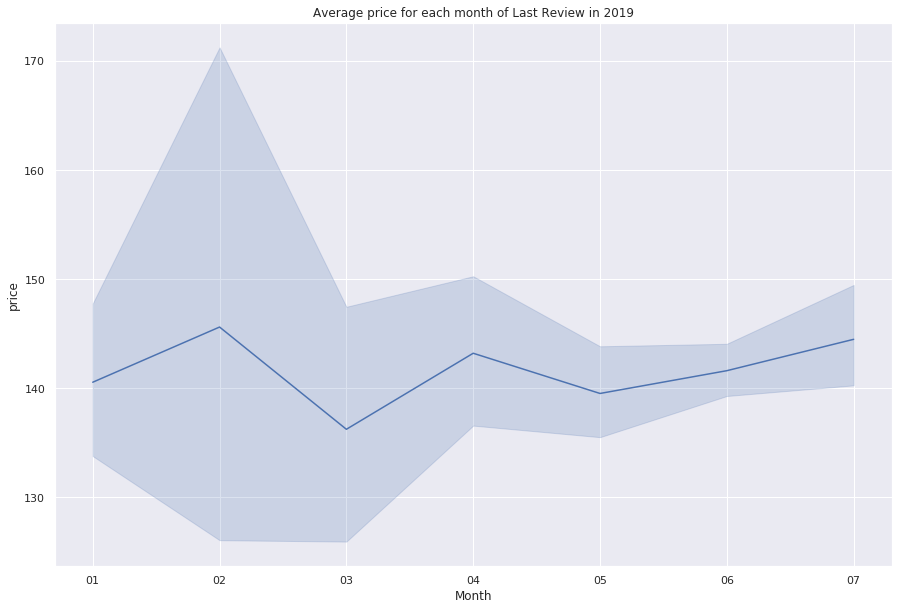

In [ ]:
last_review_2019 = df[df['Year'] == '2019']
fig = plt.figure(figsize=[15, 10])
fig = sns.lineplot(x="Month", y="price", data=last_review_2019, err_style="band")
plt.title("Average price for each month of Last Review in 2019")
plt.show()

26) สร้าง Column ใหม่ โดยคำนวณ ณ เวลาปัจจุบันถึงวันที่ Last Review ห่างกันกี่วัน (Hint: ใช้ datetime ปัจจุบัน - datetime last review)

In [ ]:
from datetime import date
today = date.today()
today_timestamp = pd.to_datetime(today)
day_diff = today_timestamp - df['last_review']
df['diff_days'] = day_diff.dt.days
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,Year,Month,reviews_per_month,calculated_host_listings_count,availability_365,time_of_week,day_of_the_week,diff_days
138,32023,FLAT MACDONOUGH,137974,Khem,Brooklyn,Bedford-Stuyvesant,40.68296,-73.93662,Entire home/apt,125,3,227,2019-06-23,2019,06,2.09,2,163,อาทิตย์,Sun,260
36528,29039497,Apartment by Central Park,32987584,Maria,Manhattan,Upper West Side,40.79574,-73.96192,Private room,70,6,22,2019-05-31,2019,05,2.42,1,0,ศุกร์,Fri,283
9048,6939758,Mid-century Apt. Next To Subway,3266476,Jack,Manhattan,Kips Bay,40.74206,-73.98014,Private room,100,5,11,2018-05-31,2018,05,0.23,1,0,พฤหัส,Thu,648
41469,32240966,Sonder | Stock Exchange | Sleek 3BR + Lounge,219517861,Sonder (NYC),Manhattan,Financial District,40.70620,-74.01192,Entire home/apt,498,2,8,2019-06-11,2019,06,2.50,327,255,อังคาร,Tue,272
9678,7436186,Beautiful bedroom in Ditmas Park!!!,6367907,J And Lana,Brooklyn,Flatbush,40.63198,-73.95988,Private room,108,2,59,2019-06-23,2019,06,1.24,1,344,อาทิตย์,Sun,260


27) สร้าง Pie Chart ของระยะห่างของเวลา ระหว่างปัจจุบันถึง Last review เฉลี่ย ของแต่ละเขต (หน่วยเป็นวัน)

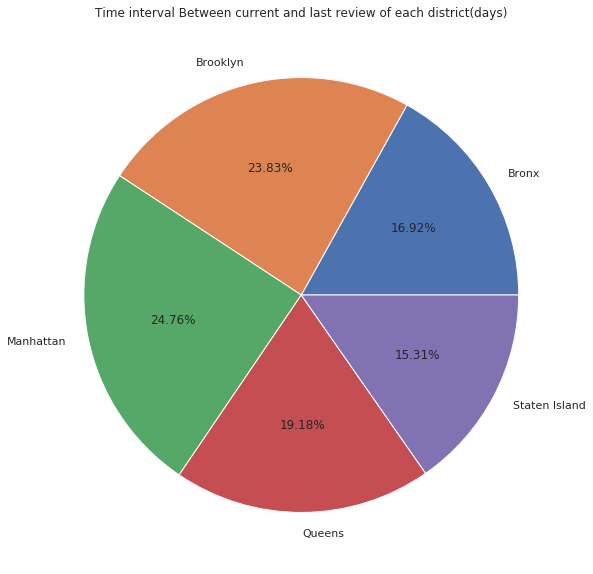

In [ ]:
date_diff = df.groupby('neighbourhood_group').mean()
date_diff = date_diff['diff_days']
plt.figure(figsize = [10, 10])
plt.pie(date_diff, labels = date_diff.index, autopct='%1.2f%%')
plt.title("Time interval Between current and last review of each district(days)")
plt.show()

28. สร้าง Bar Plot ของระยะห่างของเวลา ระหว่างปัจจุบันถึง Last review เฉลี่ย ของแต่ละพื้นที่ 10 พื้นที่แรกที่มีระยะเวลามากที่สุด (หน่วยเป็นวัน)

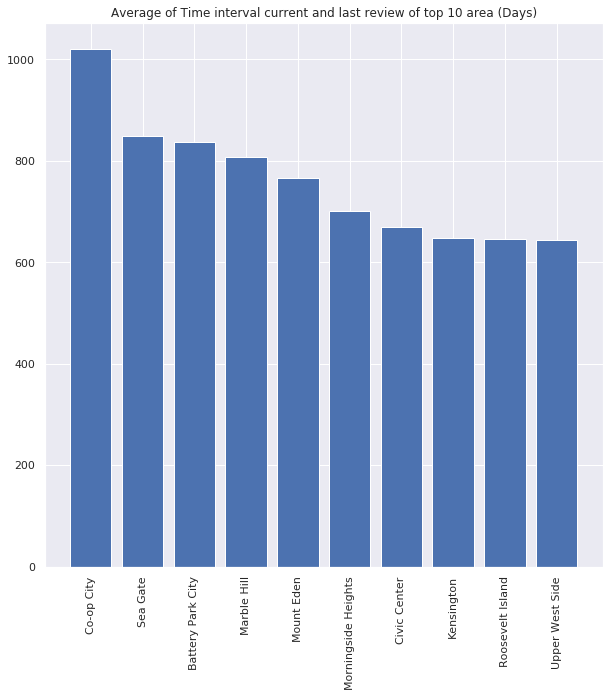

In [ ]:
date_diff = df.groupby('neighbourhood').mean().sort_values(by ='diff_days', ascending=False)
date_diff = date_diff['diff_days'].head(10)
fig = plt.figure(figsize = [10, 10])
plt.bar(date_diff.index, date_diff)
plt.xticks(rotation='vertical')
plt.title("Average of Time interval current and last review of top 10 area (Days)")
plt.show()

29) สร้าง Bar Plot ของค่าเฉลี่ยระยะเวลาห่างระหว่างปัจจุบันถึง Last review เฉลี่ย ของแต่ละพื้นที่ 10 พื้นที่แรกที่มีระยะเวลาน้อยที่สุด

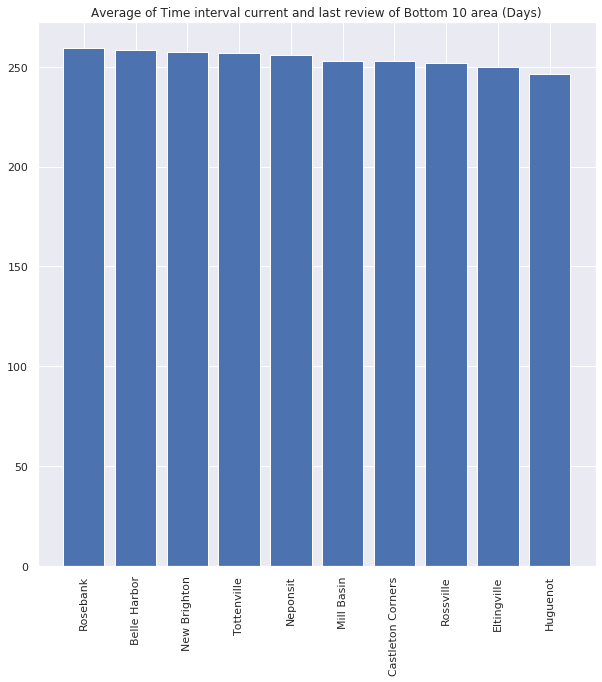

In [ ]:
date_diff = df.groupby('neighbourhood').mean().sort_values(by ='diff_days', ascending=False)
date_diff = date_diff['diff_days'].tail(10)
fig = plt.figure(figsize = [10, 10])
plt.bar(date_diff.index, date_diff)
plt.xticks(rotation='vertical')
plt.title("Average of Time interval current and last review of Bottom 10 area (Days)")
plt.show()

30) สร้าง Scatter Plot หาความสัมพันธ์ระหว่าง ระยะเวลาห่างระหว่างปัจจุบันถึง Last review กับ Minimum Nights (Hint: Correlation)

In [ ]:
#ทำการหาค่า Correlation ระหว่าง ระยะเวลาห่างระหว่างปัจจุบันถึง Last review กับ  Minimum Nights 
date_dff_corr = df['diff_days'].corr(df['minimum_nights'])
date_dff_corr

0.05280342536025627

ได้ค่า Correlattion เท่ากับ 0.05280342536025628

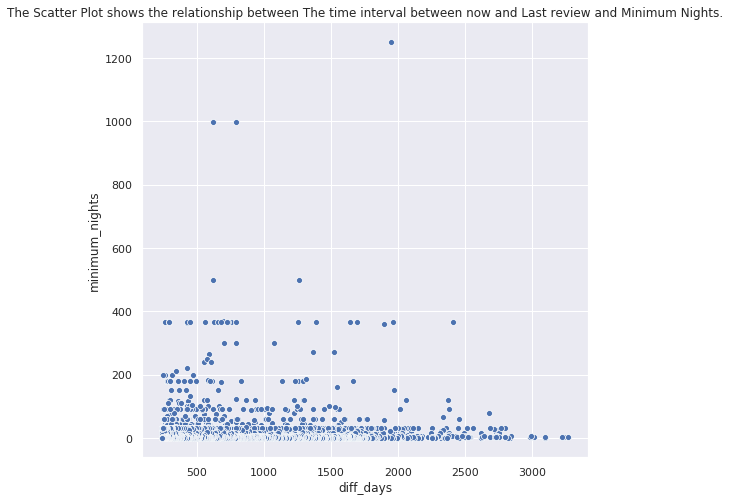

In [ ]:
fig = plt.figure(figsize=[8, 8])
sns.scatterplot('diff_days', 'minimum_nights' , data = df )
plt.title('The Scatter Plot shows the relationship between The time interval between now and Last review and Minimum Nights.')
plt.show()
